   # **Brief about dataset**
   ## The Abalone Dataset is composed of the following attributes:

<table style="border: 1px solid black; margin-left: auto;">
    <tr style="border: 1px solid black;">
    <th style="border: 1px solid black;">Name</th>
    <th style="border: 1px solid black;">Data Type</th>
    <th style="border: 1px solid black;">Meas.</th>
    <th style="border: 1px solid black;">Description</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Sex</td>
        <td style="border: 1px solid black;">nominal</td>
        <td style="border: 1px solid black;"> </td>
        <td style="border: 1px solid black;">M, F, and I (infant)</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Length</td>
        <td style="border: 1px solid black;">continuous</td>
        <td style="border: 1px solid black;">mm</td>
        <td style="border: 1px solid black;">Longest shell measurement</td>
    </tr>
    <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Diameter</td>
    <td style="border: 1px solid black;">continuous</td>
    <td style="border: 1px solid black;">mm</td>
    <td style="border: 1px solid black;">perpendicular to length</td>
    </tr>
   <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Height</td>
        <td style="border: 1px solid black;">continuous</td>
        <td style="border: 1px solid black;">mm</td>
        <td style="border: 1px solid black;">with meat in shell</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Whole weight</td>
        <td style="border: 1px solid black;">continuous</td>
        <td style="border: 1px solid black;">grams</td>
        <td style="border: 1px solid black;">whole abalone</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Shucked weight</td>
        <td style="border: 1px solid black;">continuous</td>
        <td style="border: 1px solid black;">grams</td>
        <td style="border: 1px solid black;">weight of meat</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Viscera weight</td>
        <td style="border: 1px solid black;">continuous</td>
        <td style="border: 1px solid black;">grams</td>
        <td style="border: 1px solid black;">gut weight (after bleeding)</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Shell weight</td>
        <td>continuous</td>
        <td style="border: 1px solid black;">grams</td>
        <td style="border: 1px solid black;">after being dried</td>
    </tr>
   <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">Rings</td>
        <td style="border: 1px solid black;">integer</td>
        <td style="border: 1px solid black;"> </td>
        <td style="border: 1px solid black;">+1.5 gives the age in years</td>
    </tr>
  </table>

  
  

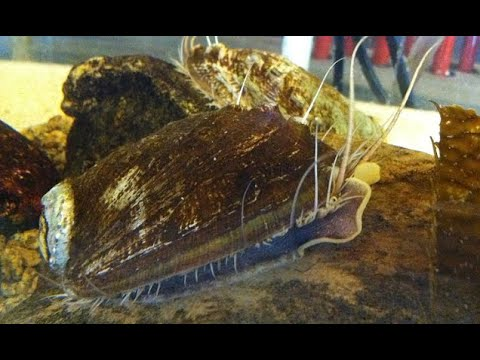

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('A2M1yKm_x1M',width=700, height=500)

# **import required libaries**

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

# load dataset

In [3]:
abalone = pd.read_csv('https://raw.githubusercontent.com/rrpatil-1/Datasets/main/abalone.csv', sep=',')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

### stastical summary of numeric feature

In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### **observations**
For the rings you need add 1.5 to get the age in years.

1. We can see that the mean length from the observations in the dataset is 0.52 mm, while the longest is 0.82 mm and the shortest is 0.075 which is tiny!

2. With the height we get a mininum of 0.0000 which is suspect because that must be a bogus observation.

3. Shell weight seems to not be more than 1 gram,

4. while the oldest Abalone is 30.5 years old and the youngest 2.5 years.

5. The heaviest abalone is 2.83 grams and the lightest 0.001.

6. The mean and median values ​​are similar.

In [5]:
#adding age column
abalone['Age']=abalone['Rings']+1.5

#drop the Rings column
abalone=abalone.drop('Rings',axis=1)

In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


We only have one categorical column while the other eight are numerical. Lets go ahead and see if there are any null values


In [7]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [8]:
# check for duplicate values
abalone.duplicated().sum()

0

In [9]:
# check for duplicate values
abalone.duplicated().sum()

0

### Univariate Analysis

In [10]:
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [11]:
(abalone['Sex'].value_counts()/abalone['Sex'].value_counts().sum())*100

M    36.581278
I    32.128322
F    31.290400
Name: Sex, dtype: float64

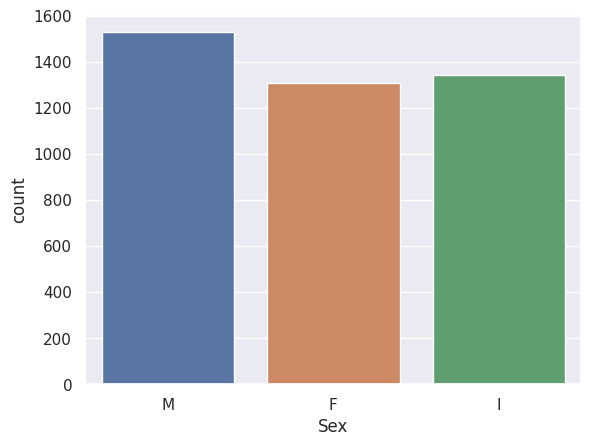

In [12]:
sns.countplot(data=abalone,x='Sex')
plt.show()


Let's look at the correlation matrices.
It gives the idea about which variables are strongly correlated to one another

<Axes: >

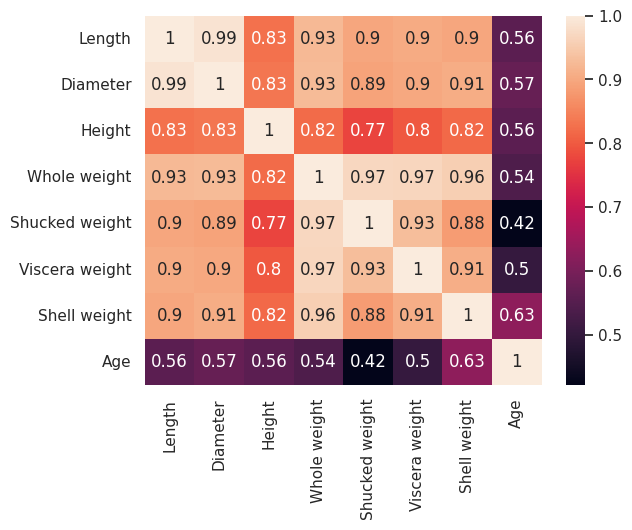

In [13]:
sns.heatmap(abalone.corr(), annot=True)

most of the variable having good positive correlation with each other except age

### **Bi-bivariate analysis**

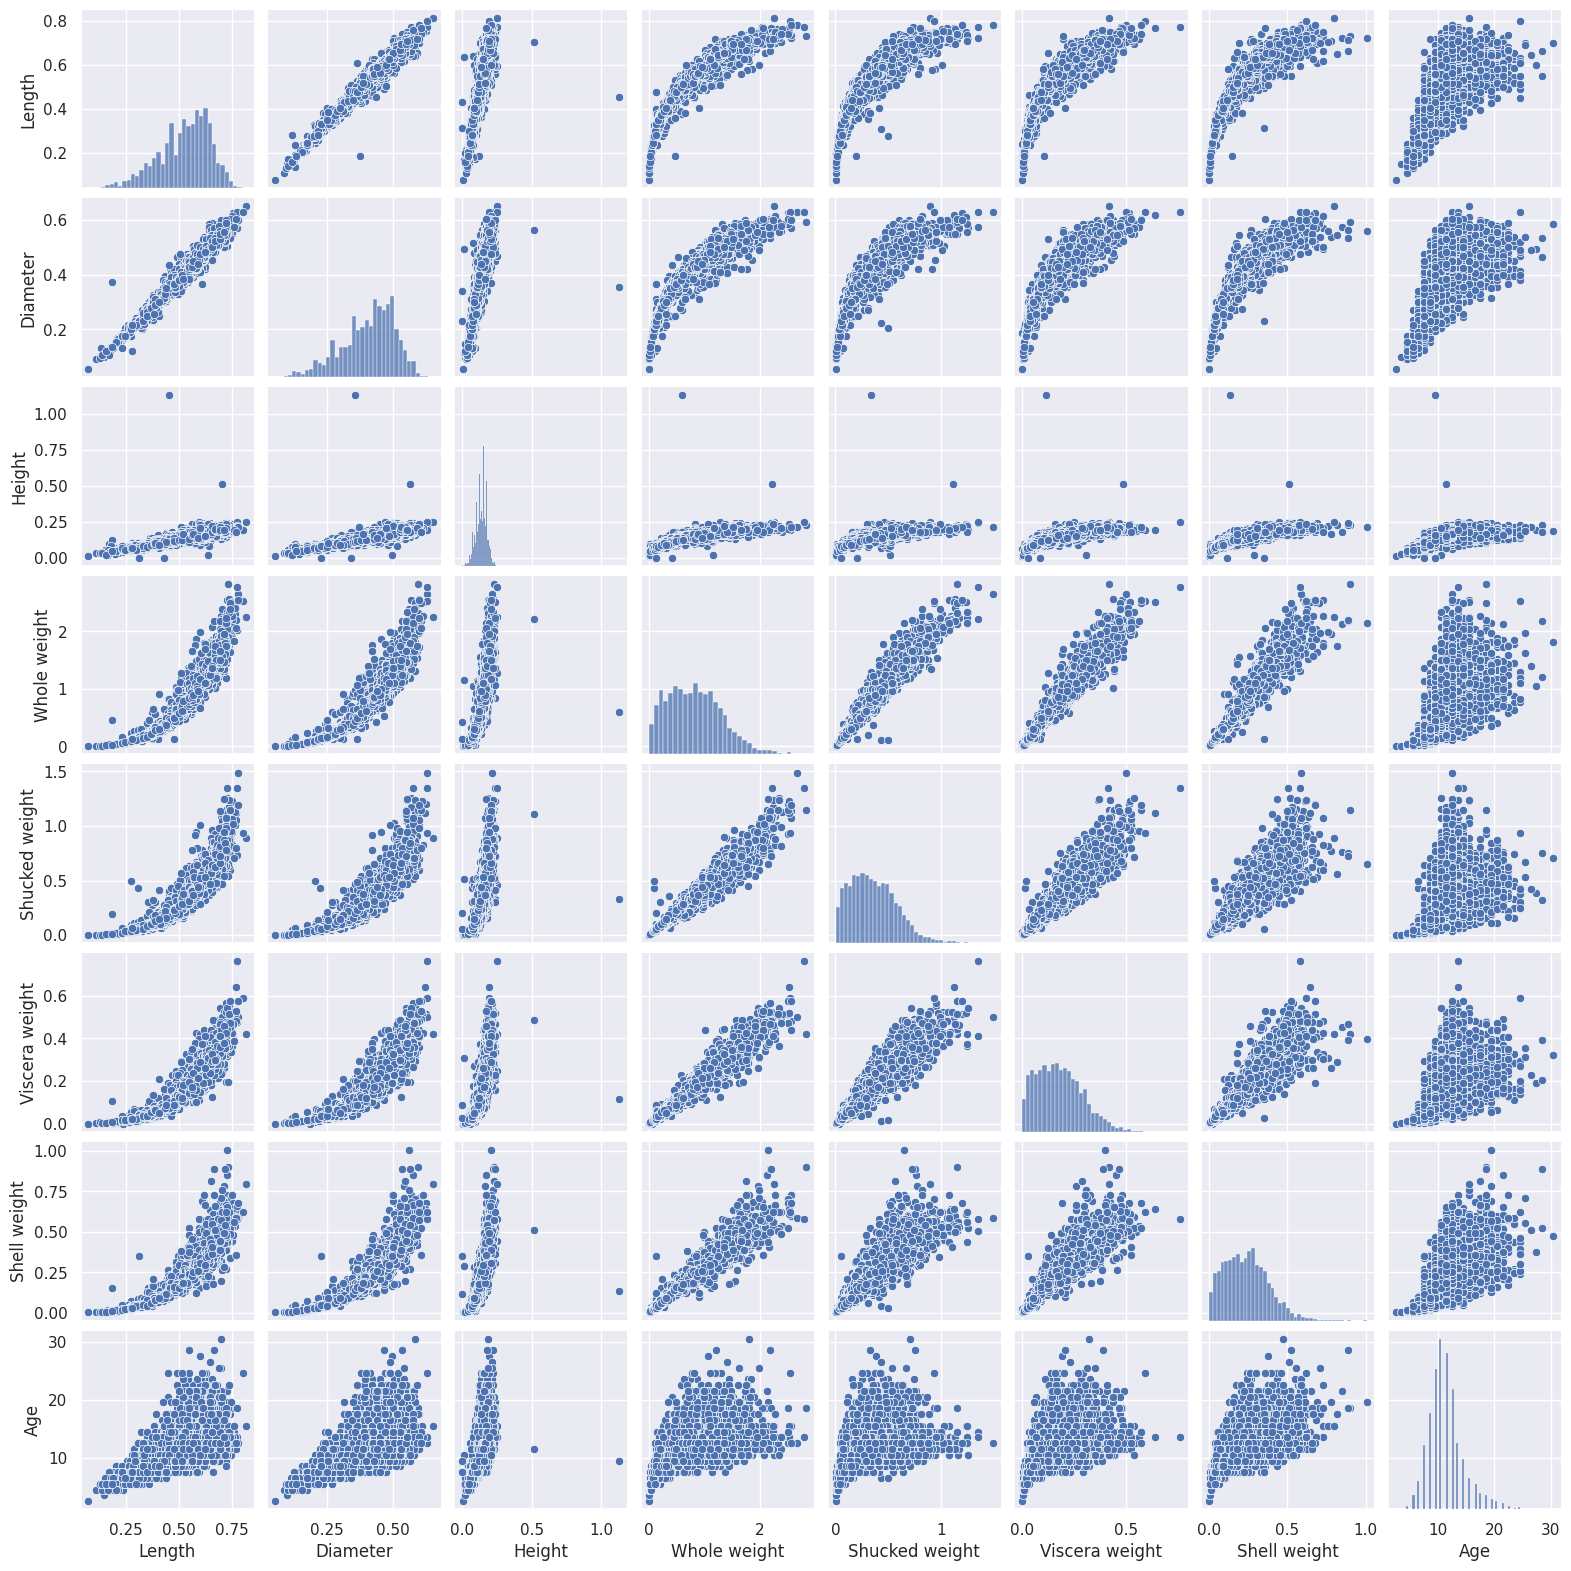

In [14]:
# cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone.drop('Sex',axis=1),size=2,kind='scatter')
plt.show()

These scatter plots give us a different overview of the correlated features

1. Height and Length have an interesting relationship in that Abalone's with a height of 0.0 mm - 0.5 mm have varing degrees of length.
2. Length and Diameter seem to have a nice linear relationship with few outliers.
3. It appears that the the number of Rings of an Abalone are all concentrated around a Height below 0.5 mm.
4. It seems that many Abalone have Rings between 5-20 that have Shell weight distributed above 0.00 grams to 0.75 grams. Also the larger in Diameter the Abalone is the more Shell weight it has too.

In [15]:
#check the skewness in feature and check whether we can remove the skewness in data
from scipy.stats import skew

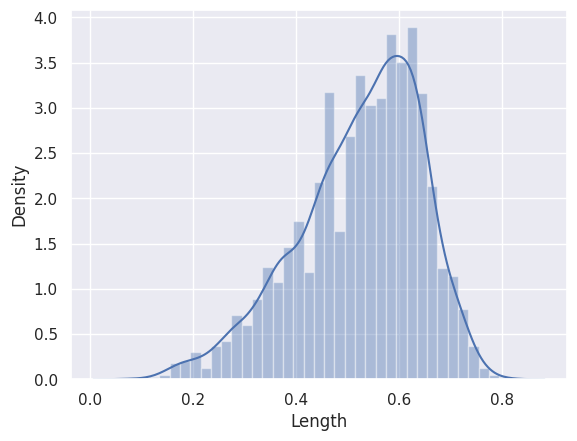

Length skewness: -0.6396434615451078 



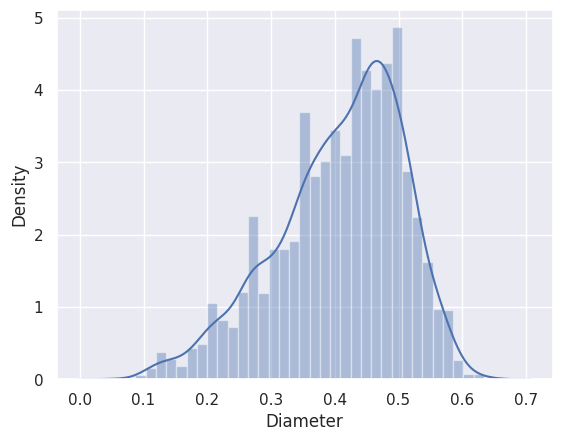

Diameter skewness: -0.6089793517180232 



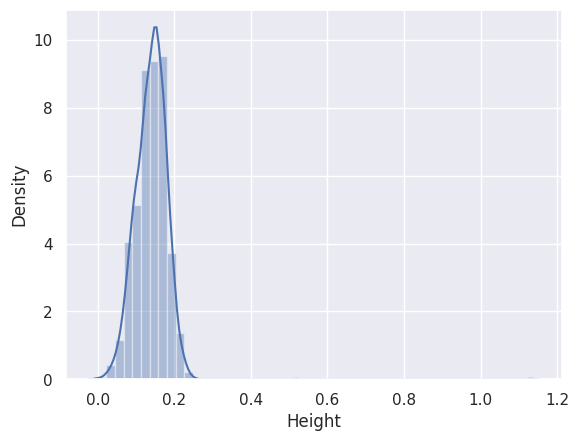

Height skewness: 3.127693679207538 



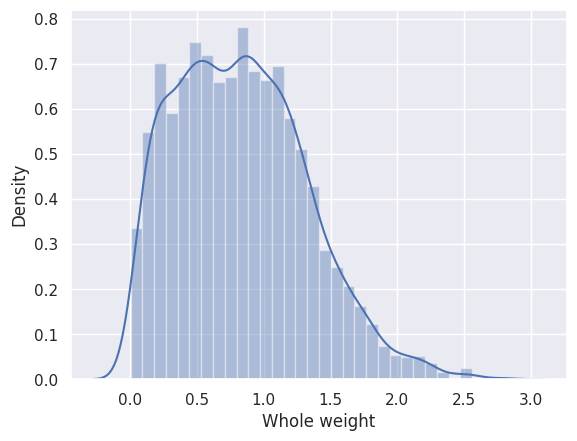

Whole weight skewness: 0.5307678720133928 



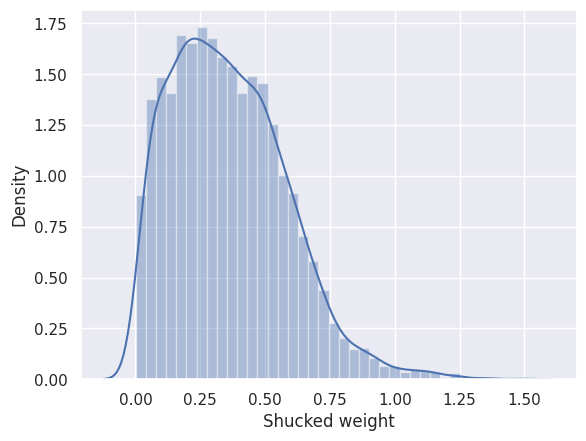

Shucked weight skewness: 0.7188396611678955 



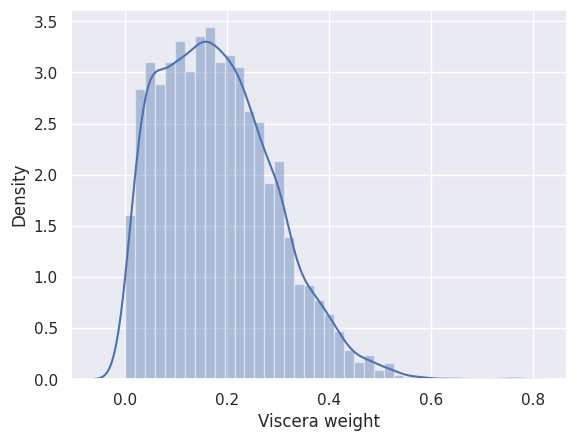

Viscera weight skewness: 0.5916395905344537 



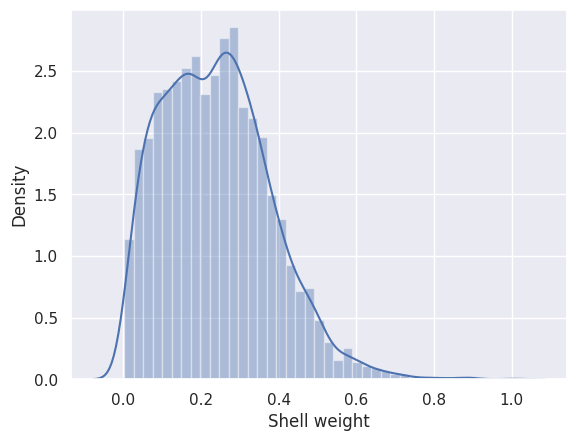

Shell weight skewness: 0.6207038222275745 



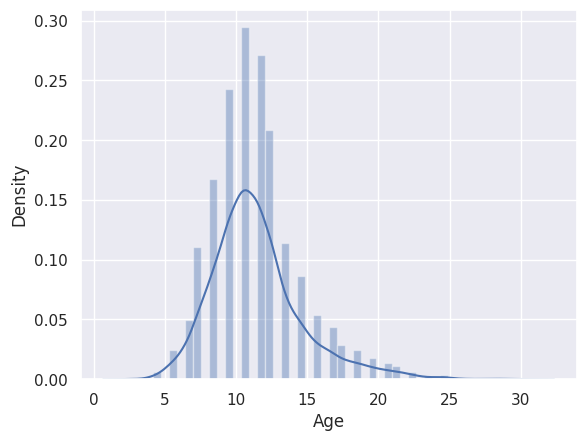

Age skewness: 1.1137017739656028 



In [16]:
for col in abalone.columns:
    if col!='Sex':
        sns.distplot(a=abalone[col])
        plt.show()
        print(col,'skewness:',skew(abalone[col]),'\n')

##**check the outliers in data**

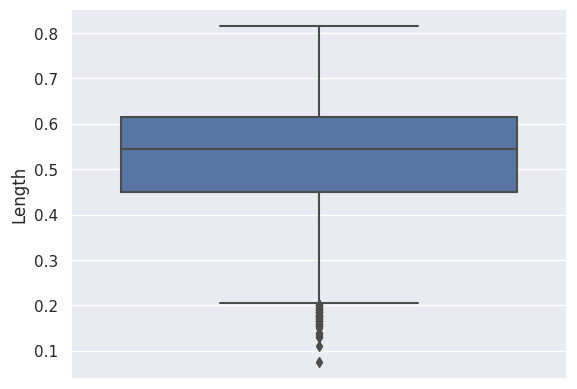

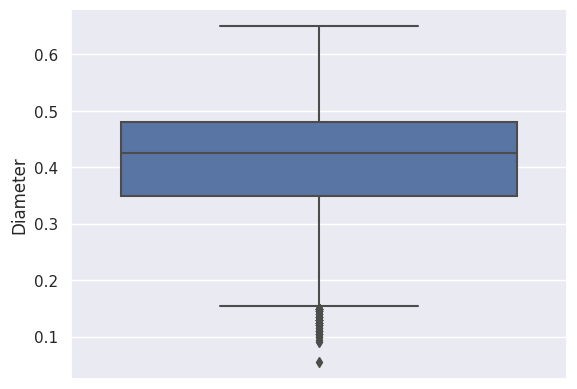

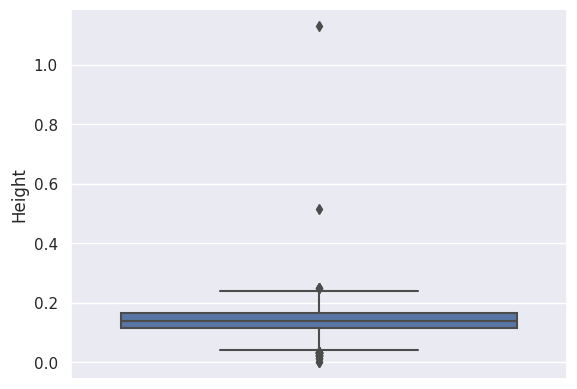

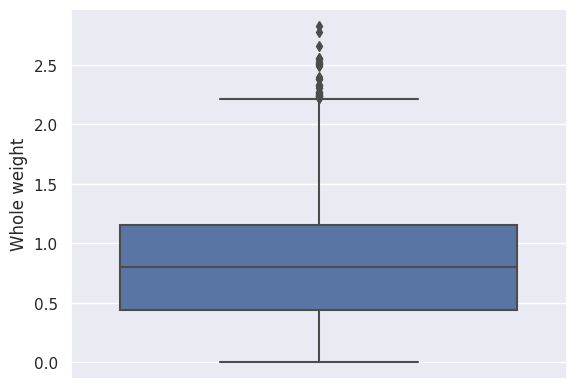

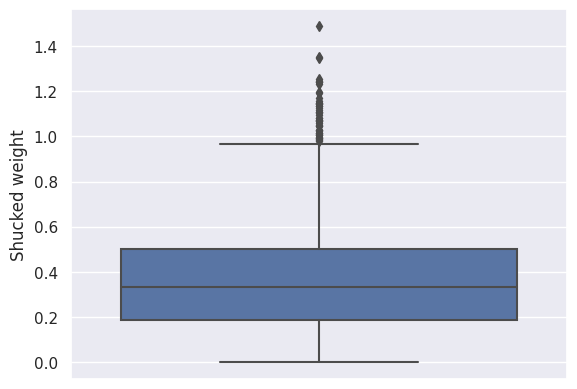

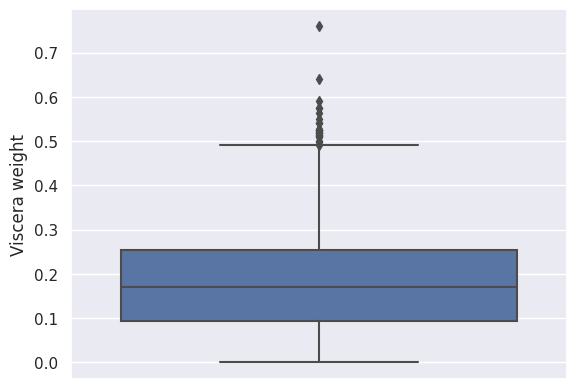

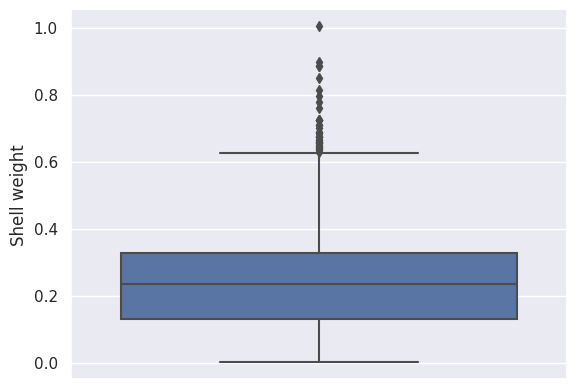

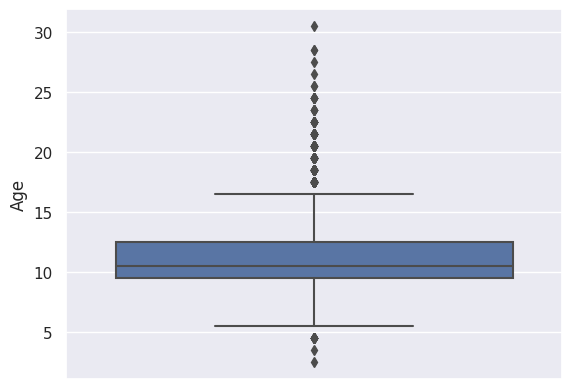

In [17]:
for col in abalone.columns:
    if col!='Sex':
        sns.boxplot(data=abalone,y=col)
        plt.show()

In [18]:
abalone[abalone['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [19]:
abalone[abalone['Age']>18]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5
32,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,19.5
33,F,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,20.5
72,F,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425,21.5
...,...,...,...,...,...,...,...,...,...
3918,F,0.645,0.490,0.190,1.3065,0.4790,0.3565,0.345,19.5
3924,F,0.500,0.400,0.165,0.7105,0.2700,0.1455,0.225,21.5
3930,F,0.670,0.535,0.185,1.5970,0.6275,0.3500,0.470,22.5
3931,I,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.300,18.5


In [20]:
abalone[abalone['Shell weight']>0.7]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
129,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,19.5
163,F,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.0050,19.5
164,F,0.650,0.545,0.230,1.7520,0.5605,0.2895,0.8150,17.5
165,M,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,15.5
166,F,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.8500,21.5
168,M,0.705,0.560,0.220,1.9810,0.8175,0.3085,0.7600,15.5
334,F,0.740,0.600,0.195,1.9740,0.5980,0.4085,0.7100,17.5
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,18.5
1428,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,15.5
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,28.5


In [21]:
abalone[abalone['Viscera weight']>0.5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
170,M,0.695,0.550,0.215,1.9565,0.7125,0.5410,0.5900,15.5
1048,M,0.710,0.565,0.205,2.1980,1.0120,0.5225,0.5475,12.5
1052,M,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,13.5
1204,M,0.735,0.585,0.185,2.1240,0.9520,0.5500,0.5000,12.5
1206,F,0.750,0.570,0.210,2.2360,1.1090,0.5195,0.5450,12.5
1207,F,0.755,0.625,0.210,2.5050,1.1965,0.5130,0.6785,12.5
1422,M,0.720,0.575,0.215,2.1730,0.9515,0.5640,0.5365,13.5
1427,F,0.750,0.610,0.235,2.5085,1.2320,0.5190,0.6120,15.5
1757,F,0.730,0.560,0.190,1.9425,0.7990,0.5195,0.5655,12.5
1759,F,0.740,0.565,0.205,2.1190,0.9655,0.5185,0.4820,13.5


In [22]:
abalone[abalone['Shucked weight']>1.1]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,18.5
1051,F,0.735,0.600,0.220,2.5550,1.1335,0.4400,0.6000,12.5
1206,F,0.750,0.570,0.210,2.2360,1.1090,0.5195,0.5450,12.5
1207,F,0.755,0.625,0.210,2.5050,1.1965,0.5130,0.6785,12.5
1209,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,12.5
1417,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,11.5
1426,F,0.745,0.570,0.215,2.2500,1.1565,0.4460,0.5580,10.5
1427,F,0.750,0.610,0.235,2.5085,1.2320,0.5190,0.6120,15.5
1528,M,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,14.5
1754,M,0.720,0.550,0.205,2.1250,1.1455,0.4425,0.5110,14.5


In [23]:
abalone[abalone['Height']>0.25]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,11.5
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,9.5


In [24]:
record_to_drop=[]
record_to_drop+=(list(abalone[abalone['Height']==0].index))

In [25]:
record_to_drop

[1257, 3996]

In [26]:
abalone=abalone.drop(record_to_drop).reset_index(drop=True)

In [27]:
# check any feature have value less than zero
(abalone.drop('Sex',axis=1)<0).values.any()

False

### No negative values in features lets check whether we can apply log or sqrt transformation to reduce the skewness in data

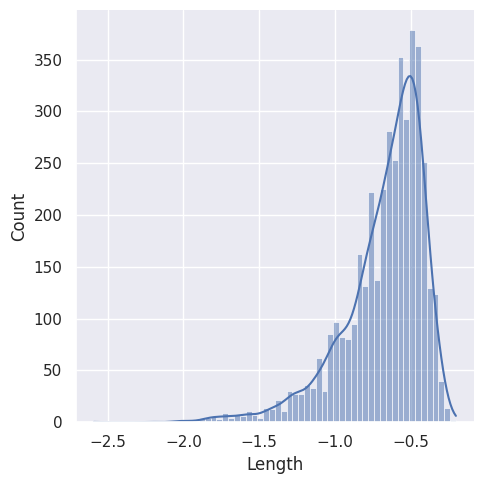

skewness for Length:-1.531889461050179


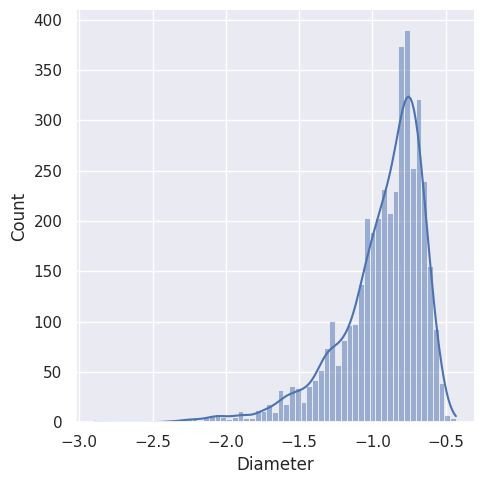

skewness for Diameter:-1.5119733881113189


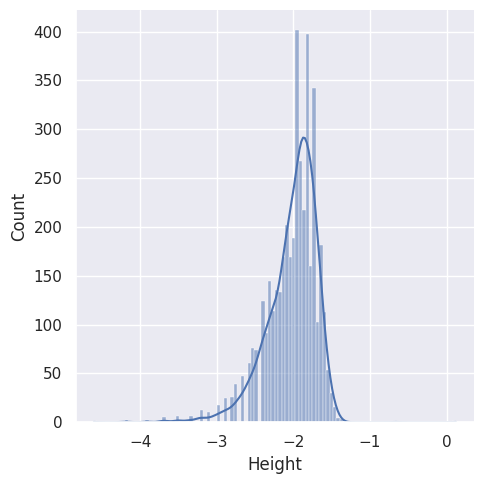

skewness for Height:-1.3694318647739707


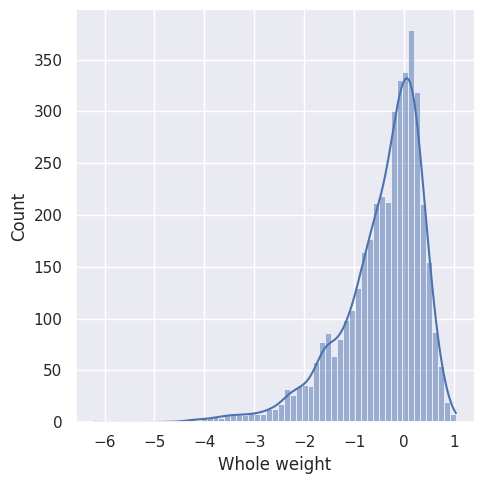

skewness for Whole weight:-1.4248005632489158


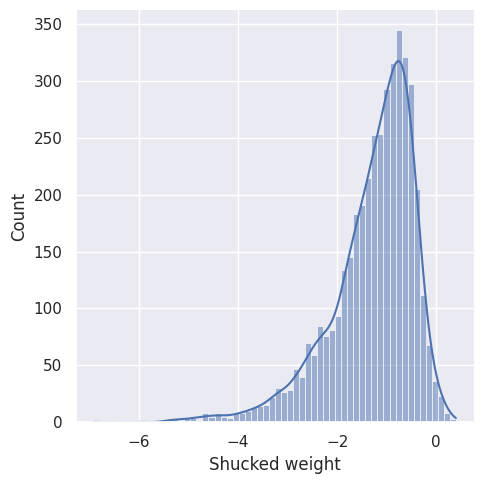

skewness for Shucked weight:-1.4123016074346835


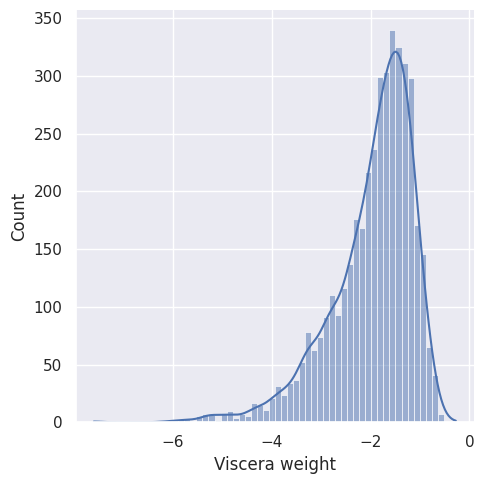

skewness for Viscera weight:-1.3979289742872882


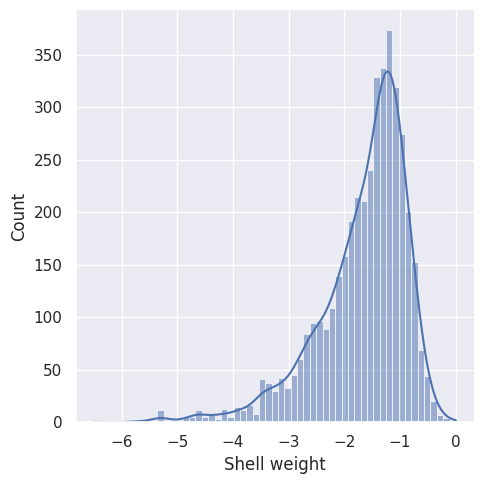

skewness for Shell weight:-1.4348306530839956


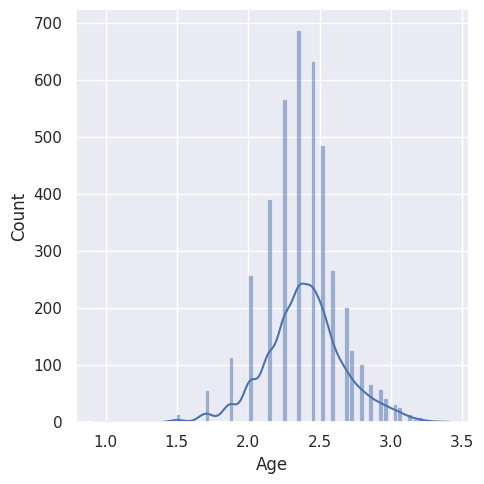

skewness for Age:0.0007230597592936412


In [28]:
for col in abalone.columns:
    if col!='Sex':
        newcol=np.log(abalone[col])
        sns.displot(x=newcol,kde=True)
        plt.show()
        print(f'skewness for {col}:{skew(newcol)}')

## **Preprocessing and Model Building**

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
#seperate the independent feature and target feature
x=abalone.drop('Sex',axis=1) #independent feature
y=abalone[['Sex']] # target feature

In [31]:
# split dataset into training and testing
# use train_test_split function to split data into training and testing
# test_size range (0 to 1) o.20 means 20% data for testing and 80% for training
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [32]:
X_train.shape

(3757, 8)

In [33]:
X_test.shape

(418, 8)

# LabelEncoder() convert categorical value to numeric
# MinMaxScaler() normalizer value leis in range of 0 to 1
# RobustScaler() use IQR instead of mean less prone to outliers
# StandardScaler() use when data is normally distrubuted values lie in range -3 to 3


In [34]:
# standardiaze the data for model builing

from sklearn.preprocessing import LabelEncoder, RobustScaler
RS = RobustScaler()
X_train,X_test=RS.fit_transform(X_train),RS.transform(X_test)

# convert categorical feature to numerica using LabelEncoder
le = LabelEncoder()
Y_train['Sex']=le.fit_transform(Y_train['Sex'])

In [35]:
Y_train

,Sex
1584,1
1087,1
37,0
1140,2
364,0
...,...
2895,1
2763,1
905,1
3980,2


In [36]:

#convert scale value to dataframe
X_train=pd.DataFrame(X_train,columns=[x.columns])
X_test=pd.DataFrame(X_test,columns=[x.columns])

In [37]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.181818,-0.500000,-0.3,-0.458626,-0.486529,-0.288401,-0.4775,0.000000
1,-0.575758,-0.461538,-0.3,-0.473352,-0.385103,-0.454545,-0.5100,-0.333333
2,-0.575758,-0.538462,-0.7,-0.388499,-0.310618,-0.341693,-0.4425,-0.333333
3,0.181818,0.230769,-0.1,0.150771,0.283677,0.163009,0.1325,0.000000
4,0.454545,0.576923,0.7,0.542076,0.518225,0.818182,0.5825,1.000000
...,...,...,...,...,...,...,...,...
3752,0.000000,0.038462,-0.2,-0.056101,0.072900,-0.112853,-0.1400,-0.333333
3753,0.030303,0.307692,0.2,0.191445,0.462758,0.018809,0.0500,0.000000
3754,-1.363636,-1.423077,-1.0,-0.900421,-0.839937,-0.905956,-0.9550,-1.333333
3755,0.121212,0.230769,0.2,0.252454,0.345483,0.213166,0.2075,-0.333333


In [38]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#convert function with parameter as object of algorithum

def model(model):
    """
     ::model= object of algorithum
    """
    model.fit(X_train,Y_train) # train the model

    y_pred=model.predict(X_test) # predict the output for test data

    y_pred=le.inverse_transform(y_pred) #convert number back to category

    print(classification_report(Y_test,y_pred)) #print classification report

    cm=confusion_matrix(Y_test,y_pred) # confusion matrix

    # visualize confusion matrix with seaborn heatmap

    cm_matrix = pd.DataFrame(data=cm, columns=['F', 'I','M'],
                                 index=['F', 'I','M'])

    # display confusion matrix on heatmap chart
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

              precision    recall  f1-score   support

           F       0.36      0.59      0.45       117
           I       0.62      0.79      0.69       136
           M       0.43      0.15      0.22       165

    accuracy                           0.48       418
   macro avg       0.47      0.51      0.45       418
weighted avg       0.47      0.48      0.44       418



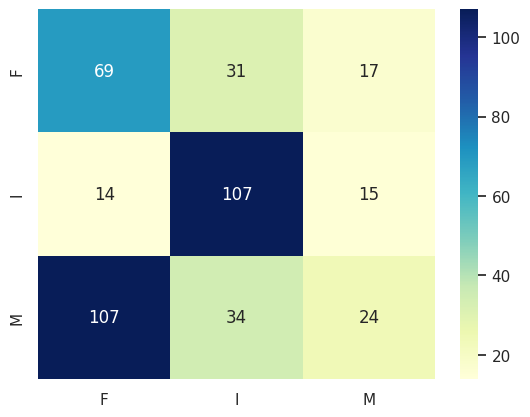

In [39]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
model(gnb)

              precision    recall  f1-score   support

           F       0.44      0.40      0.42       117
           I       0.64      0.83      0.72       136
           M       0.60      0.49      0.54       165

    accuracy                           0.58       418
   macro avg       0.56      0.57      0.56       418
weighted avg       0.57      0.58      0.57       418



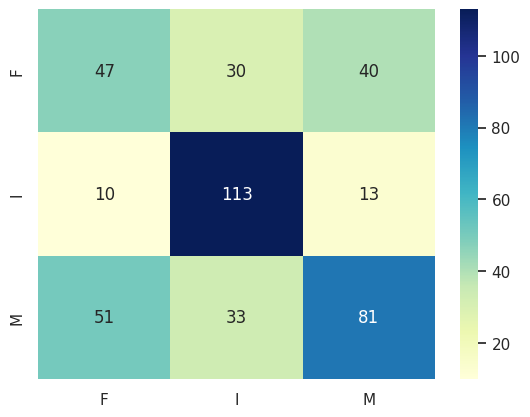

In [40]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

model(lr)

              precision    recall  f1-score   support

           F       0.43      0.30      0.35       117
           I       0.70      0.78      0.74       136
           M       0.54      0.61      0.57       165

    accuracy                           0.58       418
   macro avg       0.56      0.56      0.55       418
weighted avg       0.56      0.58      0.56       418



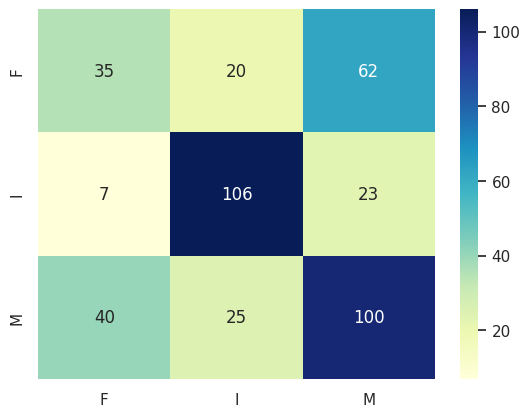

In [41]:
from sklearn.svm import LinearSVC,SVC
svc=SVC(kernel='rbf',C=1)
model(svc)

              precision    recall  f1-score   support

           F       0.34      0.40      0.37       117
           I       0.63      0.65      0.64       136
           M       0.47      0.40      0.43       165

    accuracy                           0.48       418
   macro avg       0.48      0.48      0.48       418
weighted avg       0.49      0.48      0.48       418



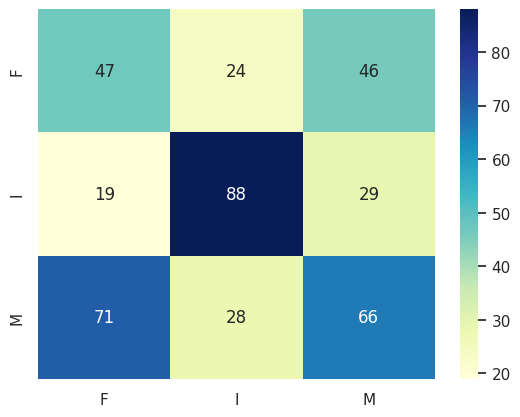

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model(dt)

## **To build machine learning model thumb rule is minimum data required is 10K.**
## **Naive Bayes algorithum is not suitable for ths datatset as not the single feature follow the normal distrubution.**
## **Naive bayes algorithum gives good result when data is normally distrubuted.**
## **LogisticRegression and support vector machine algorithum are giving good accuracy as comapre to other algorithum**

